In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from constants import *
import matplotlib.gridspec as gridspec
import seaborn as sns

In [39]:
def get_labels(xticks, gap):
#     l = ["MA {}".format(i.split("_")[0], i.split("_")[-1]) for i in xticks]
    l = ["MA\n{}".format(i.split("_")[0]) if "_" in str(i) else i for i in xticks]
    return [elem if i % gap == 0 else '' for i, elem in enumerate(l)]

In [45]:
def plot_graph(fname):
    fname = "{}/{}.csv".format(DATA_ODDS_RATIO_MODULE, fname)
    df = pd.read_csv(fname)

    # No data
    df = df[~(df['state_code'] == 25)]

    sns.set_style("whitegrid")
    gap = 2
    plt.close()
    plt.figure(figsize=(9, 6), dpi=600)
    gs = gridspec.GridSpec(3, 3)
    rows = [(i, j) for i in range(0, 3) for j in range(0, 3)]
    unique_state_codes = sorted(df['state_code'].unique().tolist())
    for index, state_code in enumerate(unique_state_codes):
        row, col = rows[index][0], rows[index][1]
        ax = plt.subplot(gs[row, col])
        ax.text(-0.03, 1.08, "{})".format(chr(97+index)), transform=ax.transAxes, size=10, color='black')
        tdf = df[df['state_code'] == state_code].reset_index()
        state_name = tdf['State Name'].unique()[0]
        xticks = tdf['year'].tolist()
        y = tdf['Odds Ratio'].tolist()
        ci_95 = tdf['95%'].tolist()
        yerr = [i-j for i, j in zip(ci_95, y)]
        x = list(range(len(xticks)))
        plt.errorbar(x, y, yerr = yerr)
        plt.ylim(0, 8)
        plt.hlines(1, xmin=min(x), xmax=max(x), color='r', linestyles='--', linewidth=0.5)
        plt.title(state_name)
        plt.yticks([0, 1, 2], [0, 1, 2])
        plt.ylabel("aOR")
    #     sns.despine()
        if col!=0:
            ax.get_yaxis().set_visible(False)
            ax.spines['left'].set_visible(False)
        if row != 2:
            plt.xticks(x, [""]*len(x), fontsize=1, rotation=0)
        else:
            plt.xticks(x, get_labels(xticks, gap), fontsize=9, rotation=0)

    #         ax.get_xaxis().set_visible(False)
    #         ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)




    plt.tight_layout()
    plt.savefig("output_images/old.png", bbox_inches='tight')

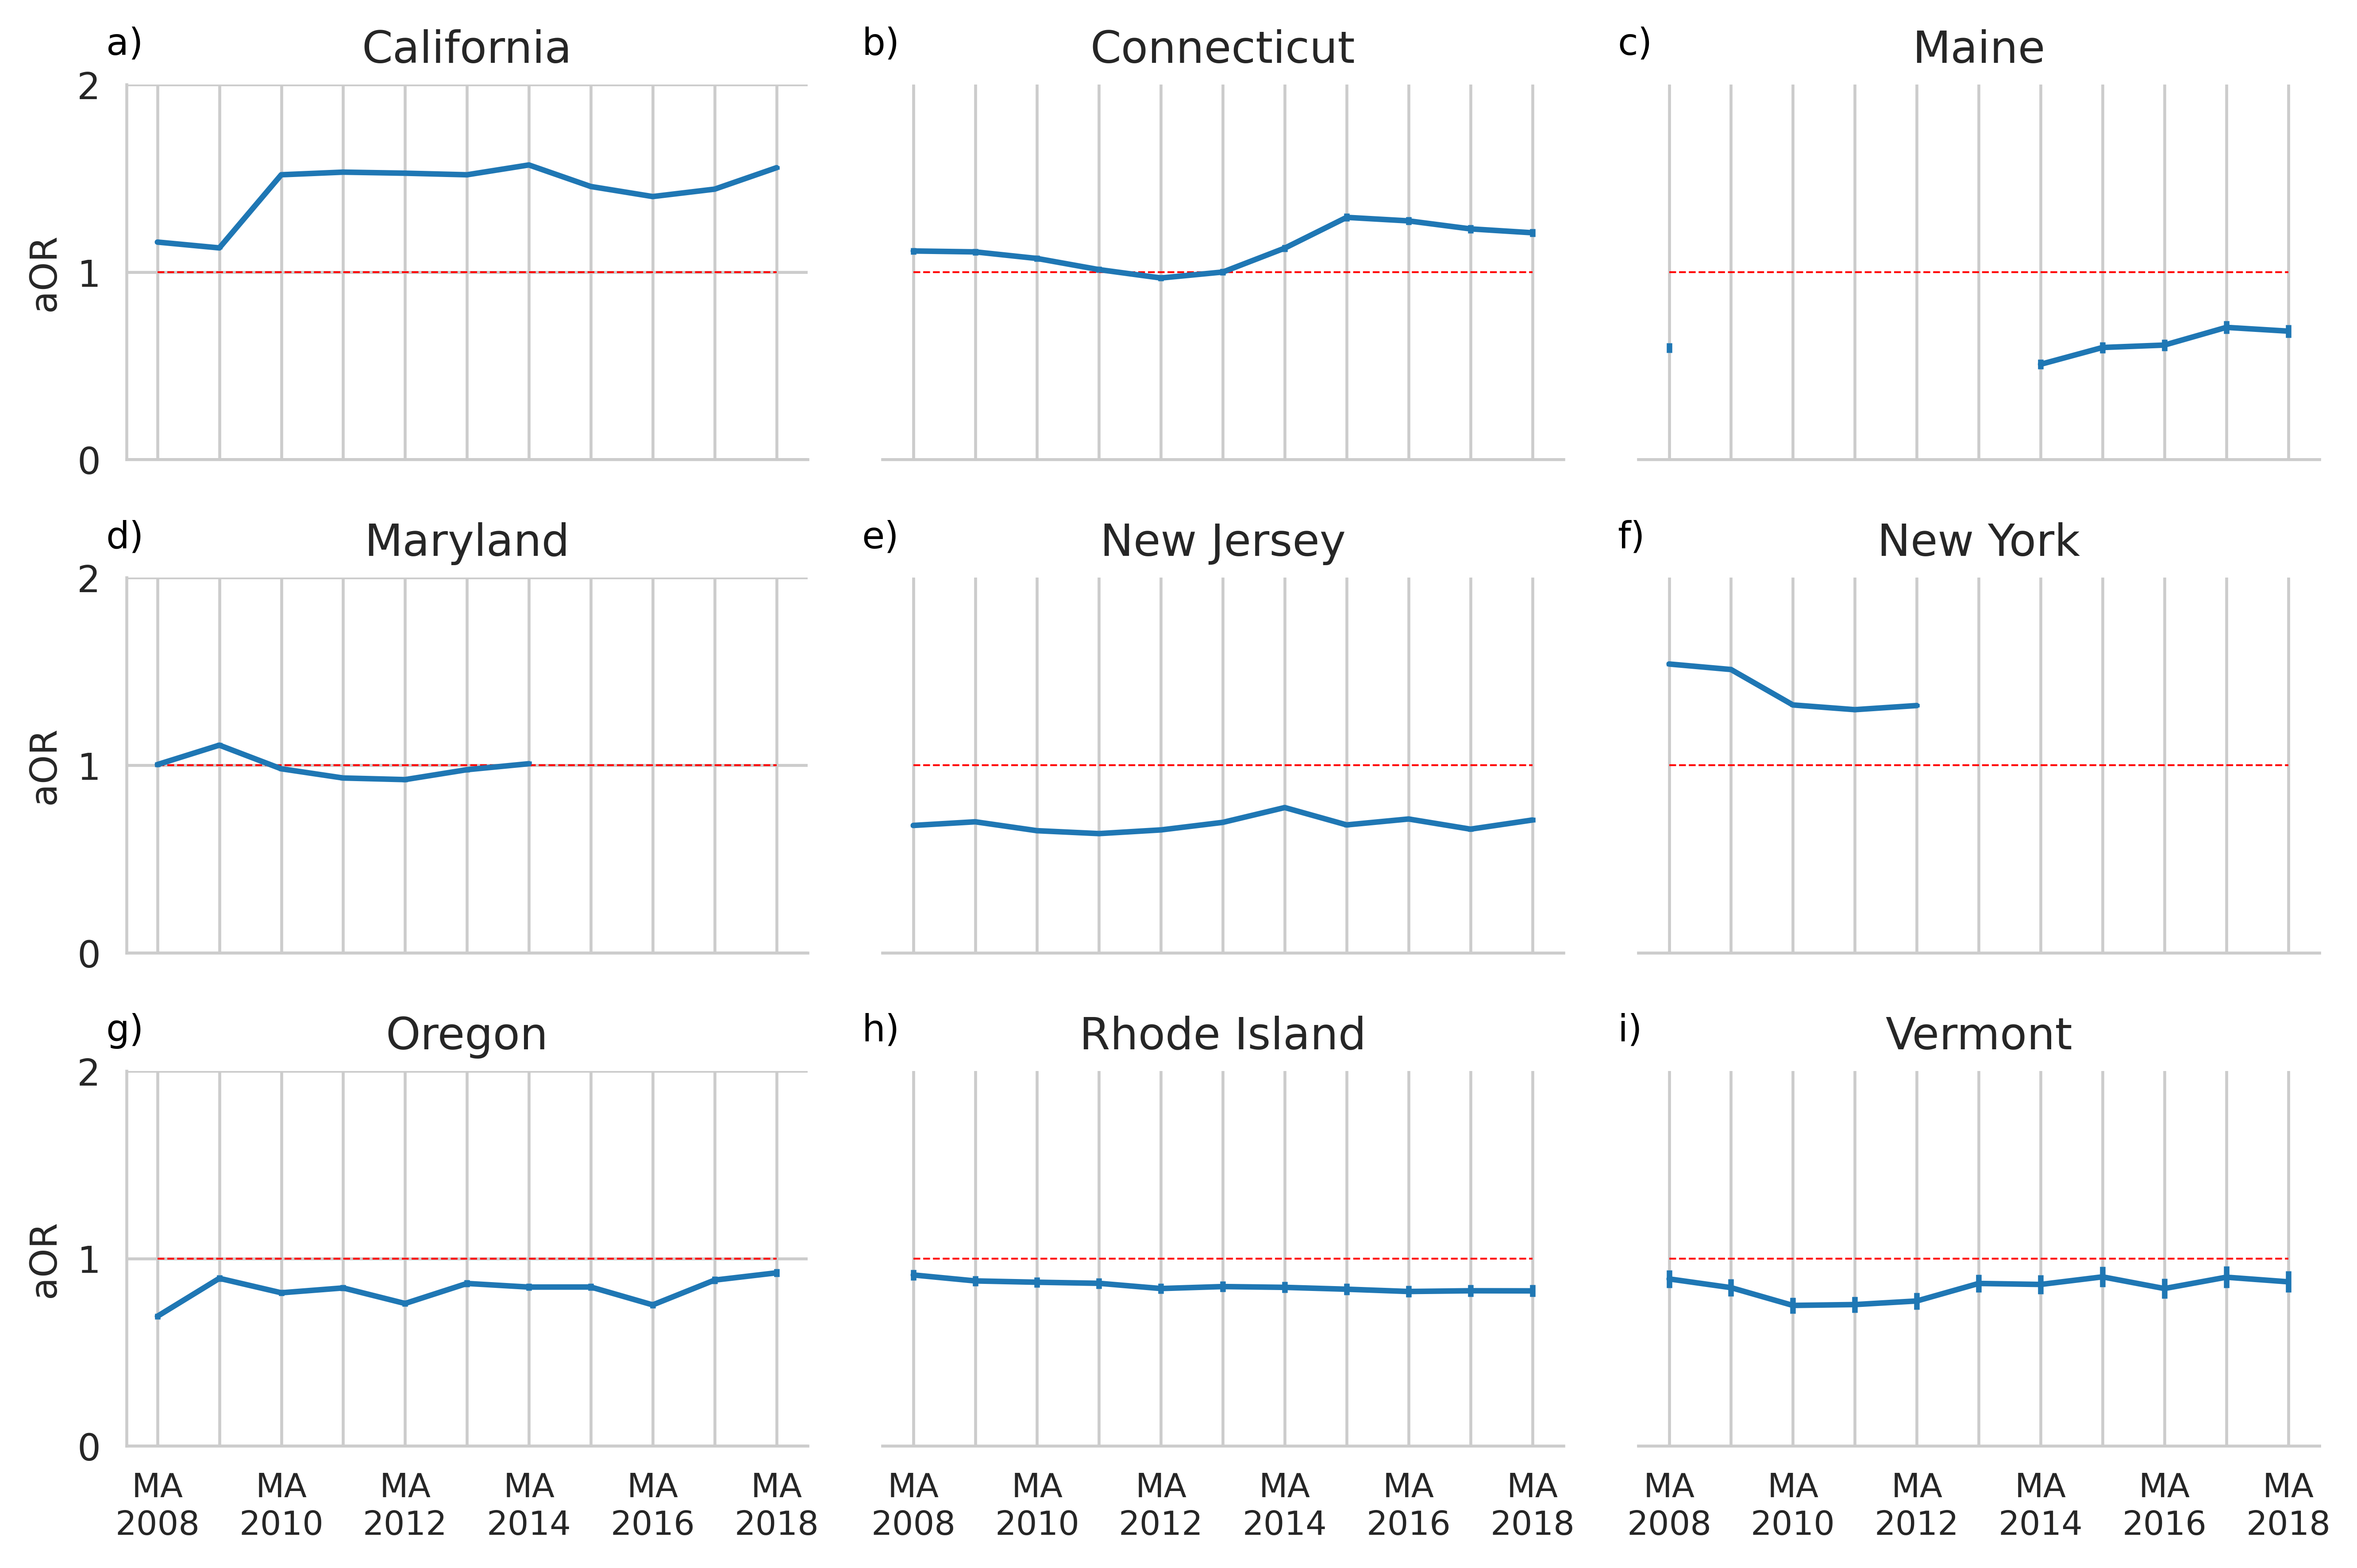

In [42]:
plot_graph("three_year")

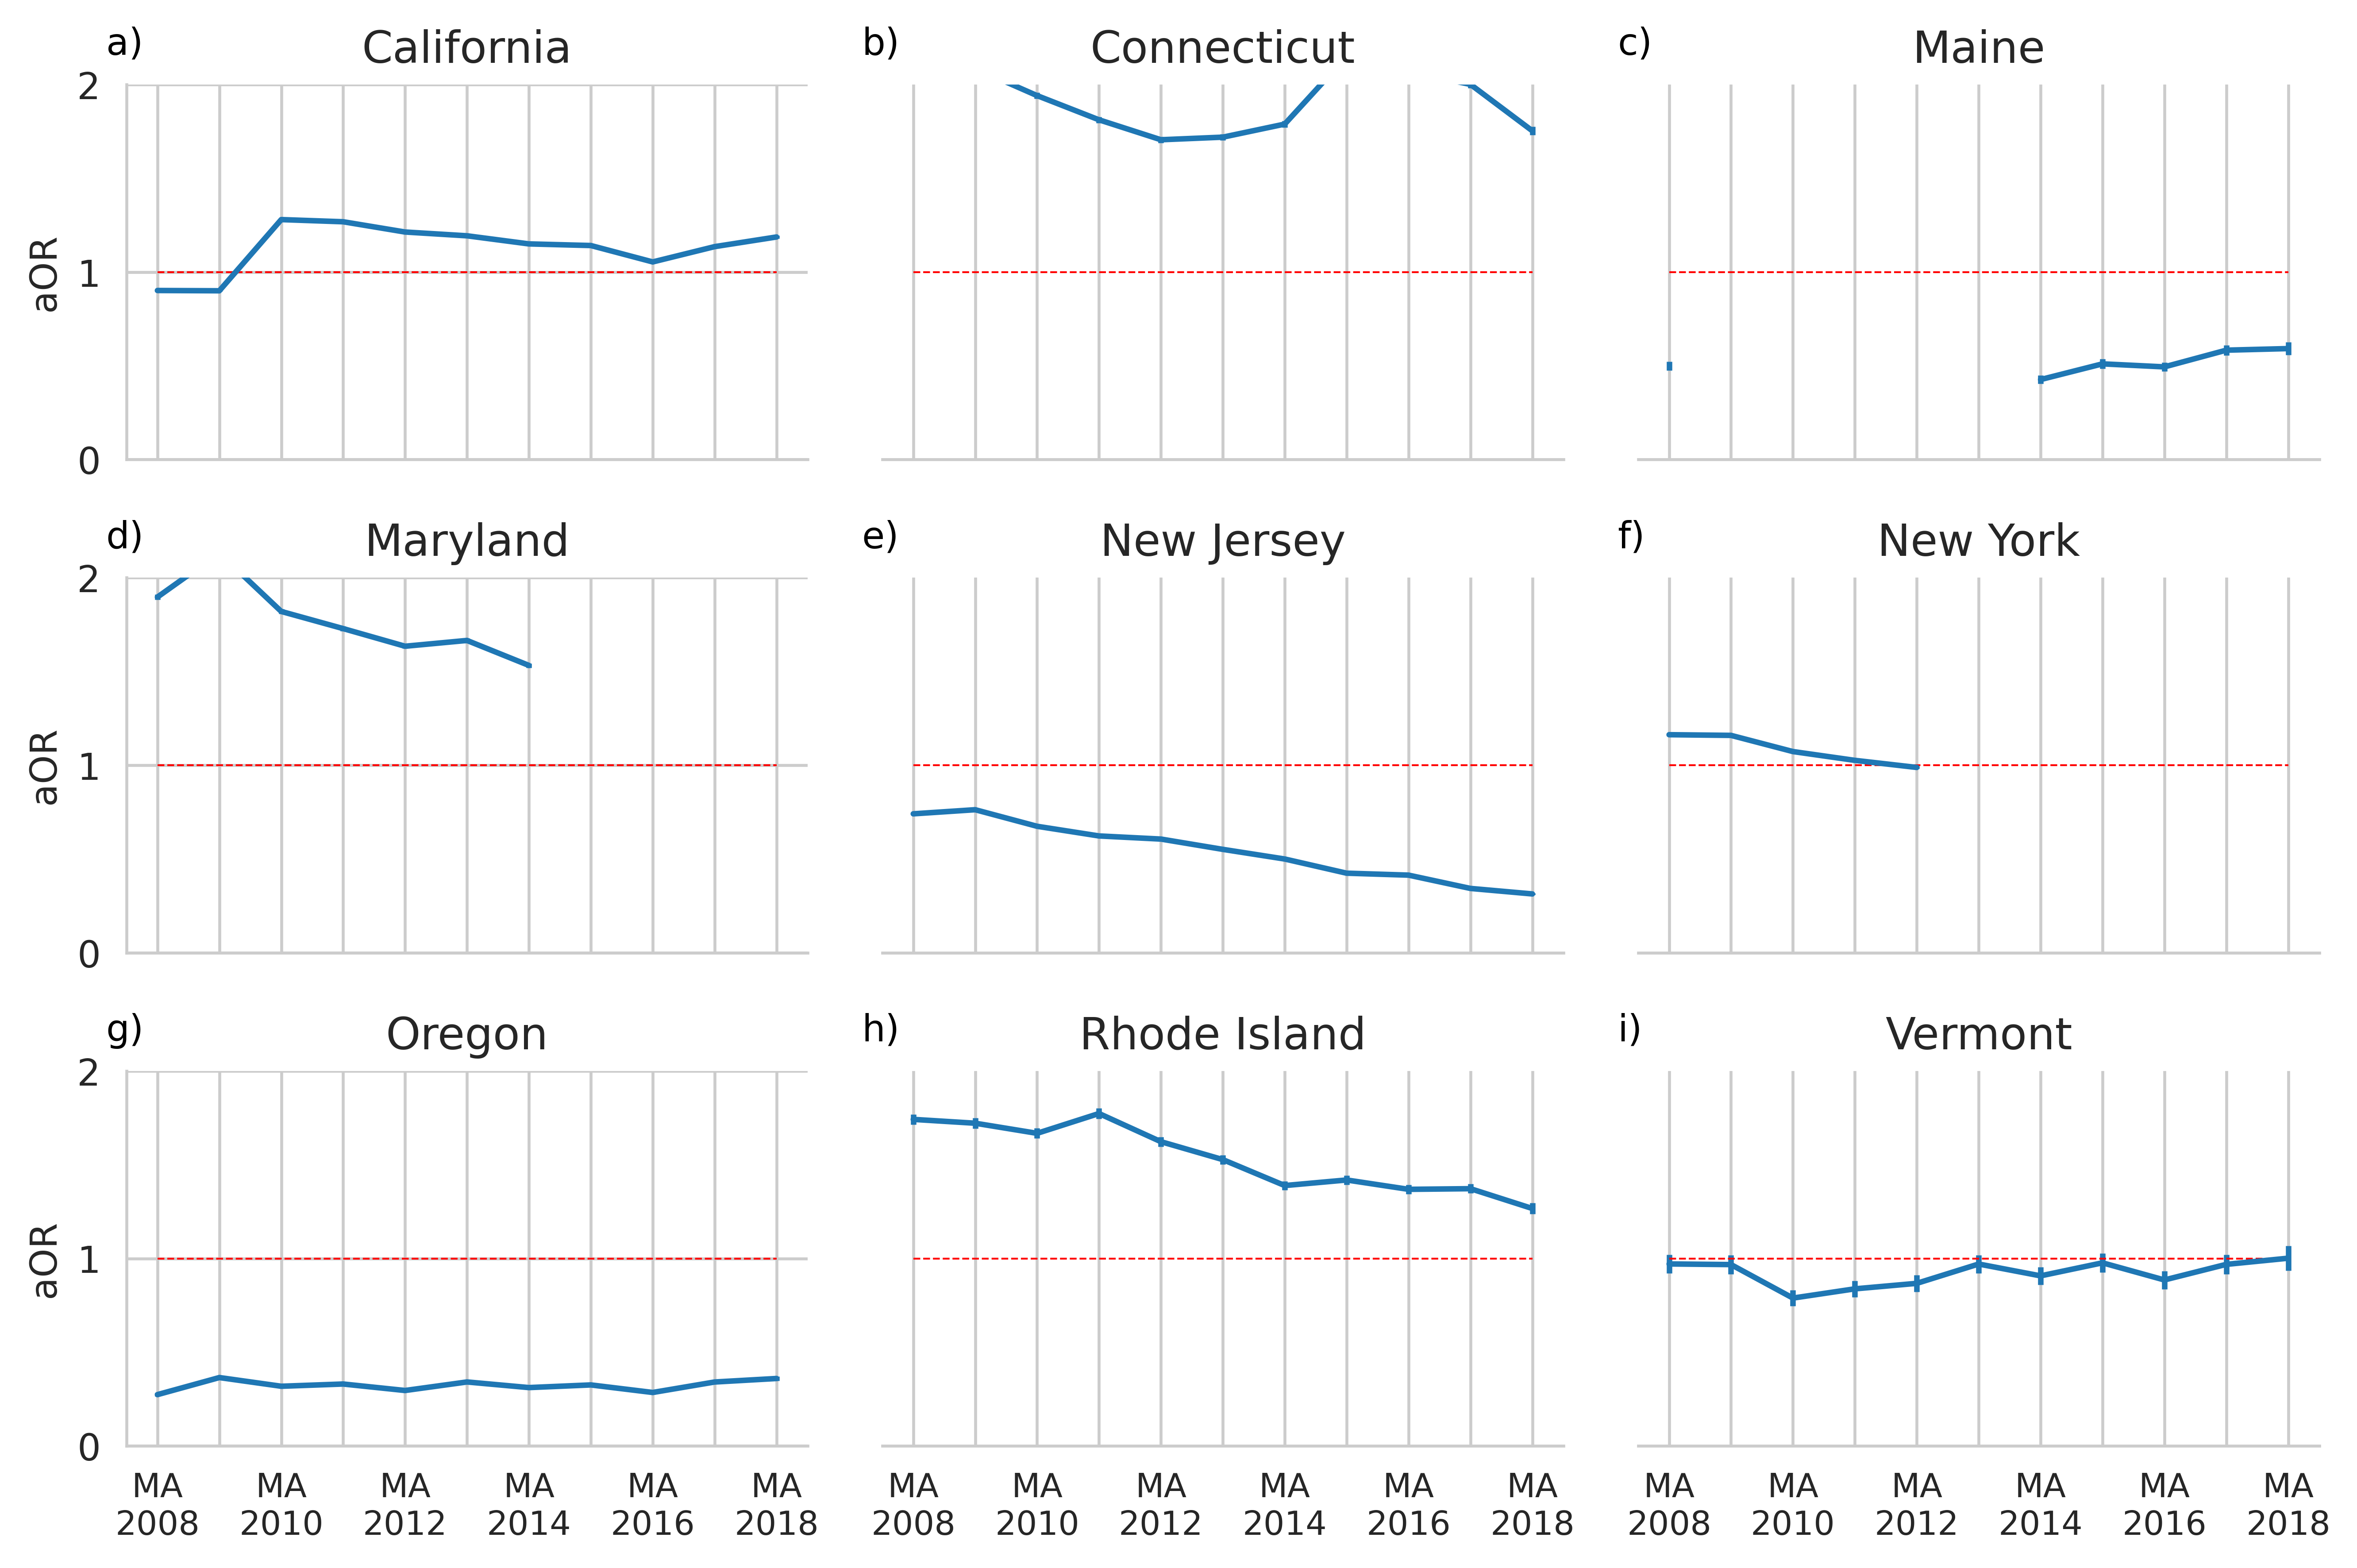

In [43]:
plot_graph("three_year_group_2_old")

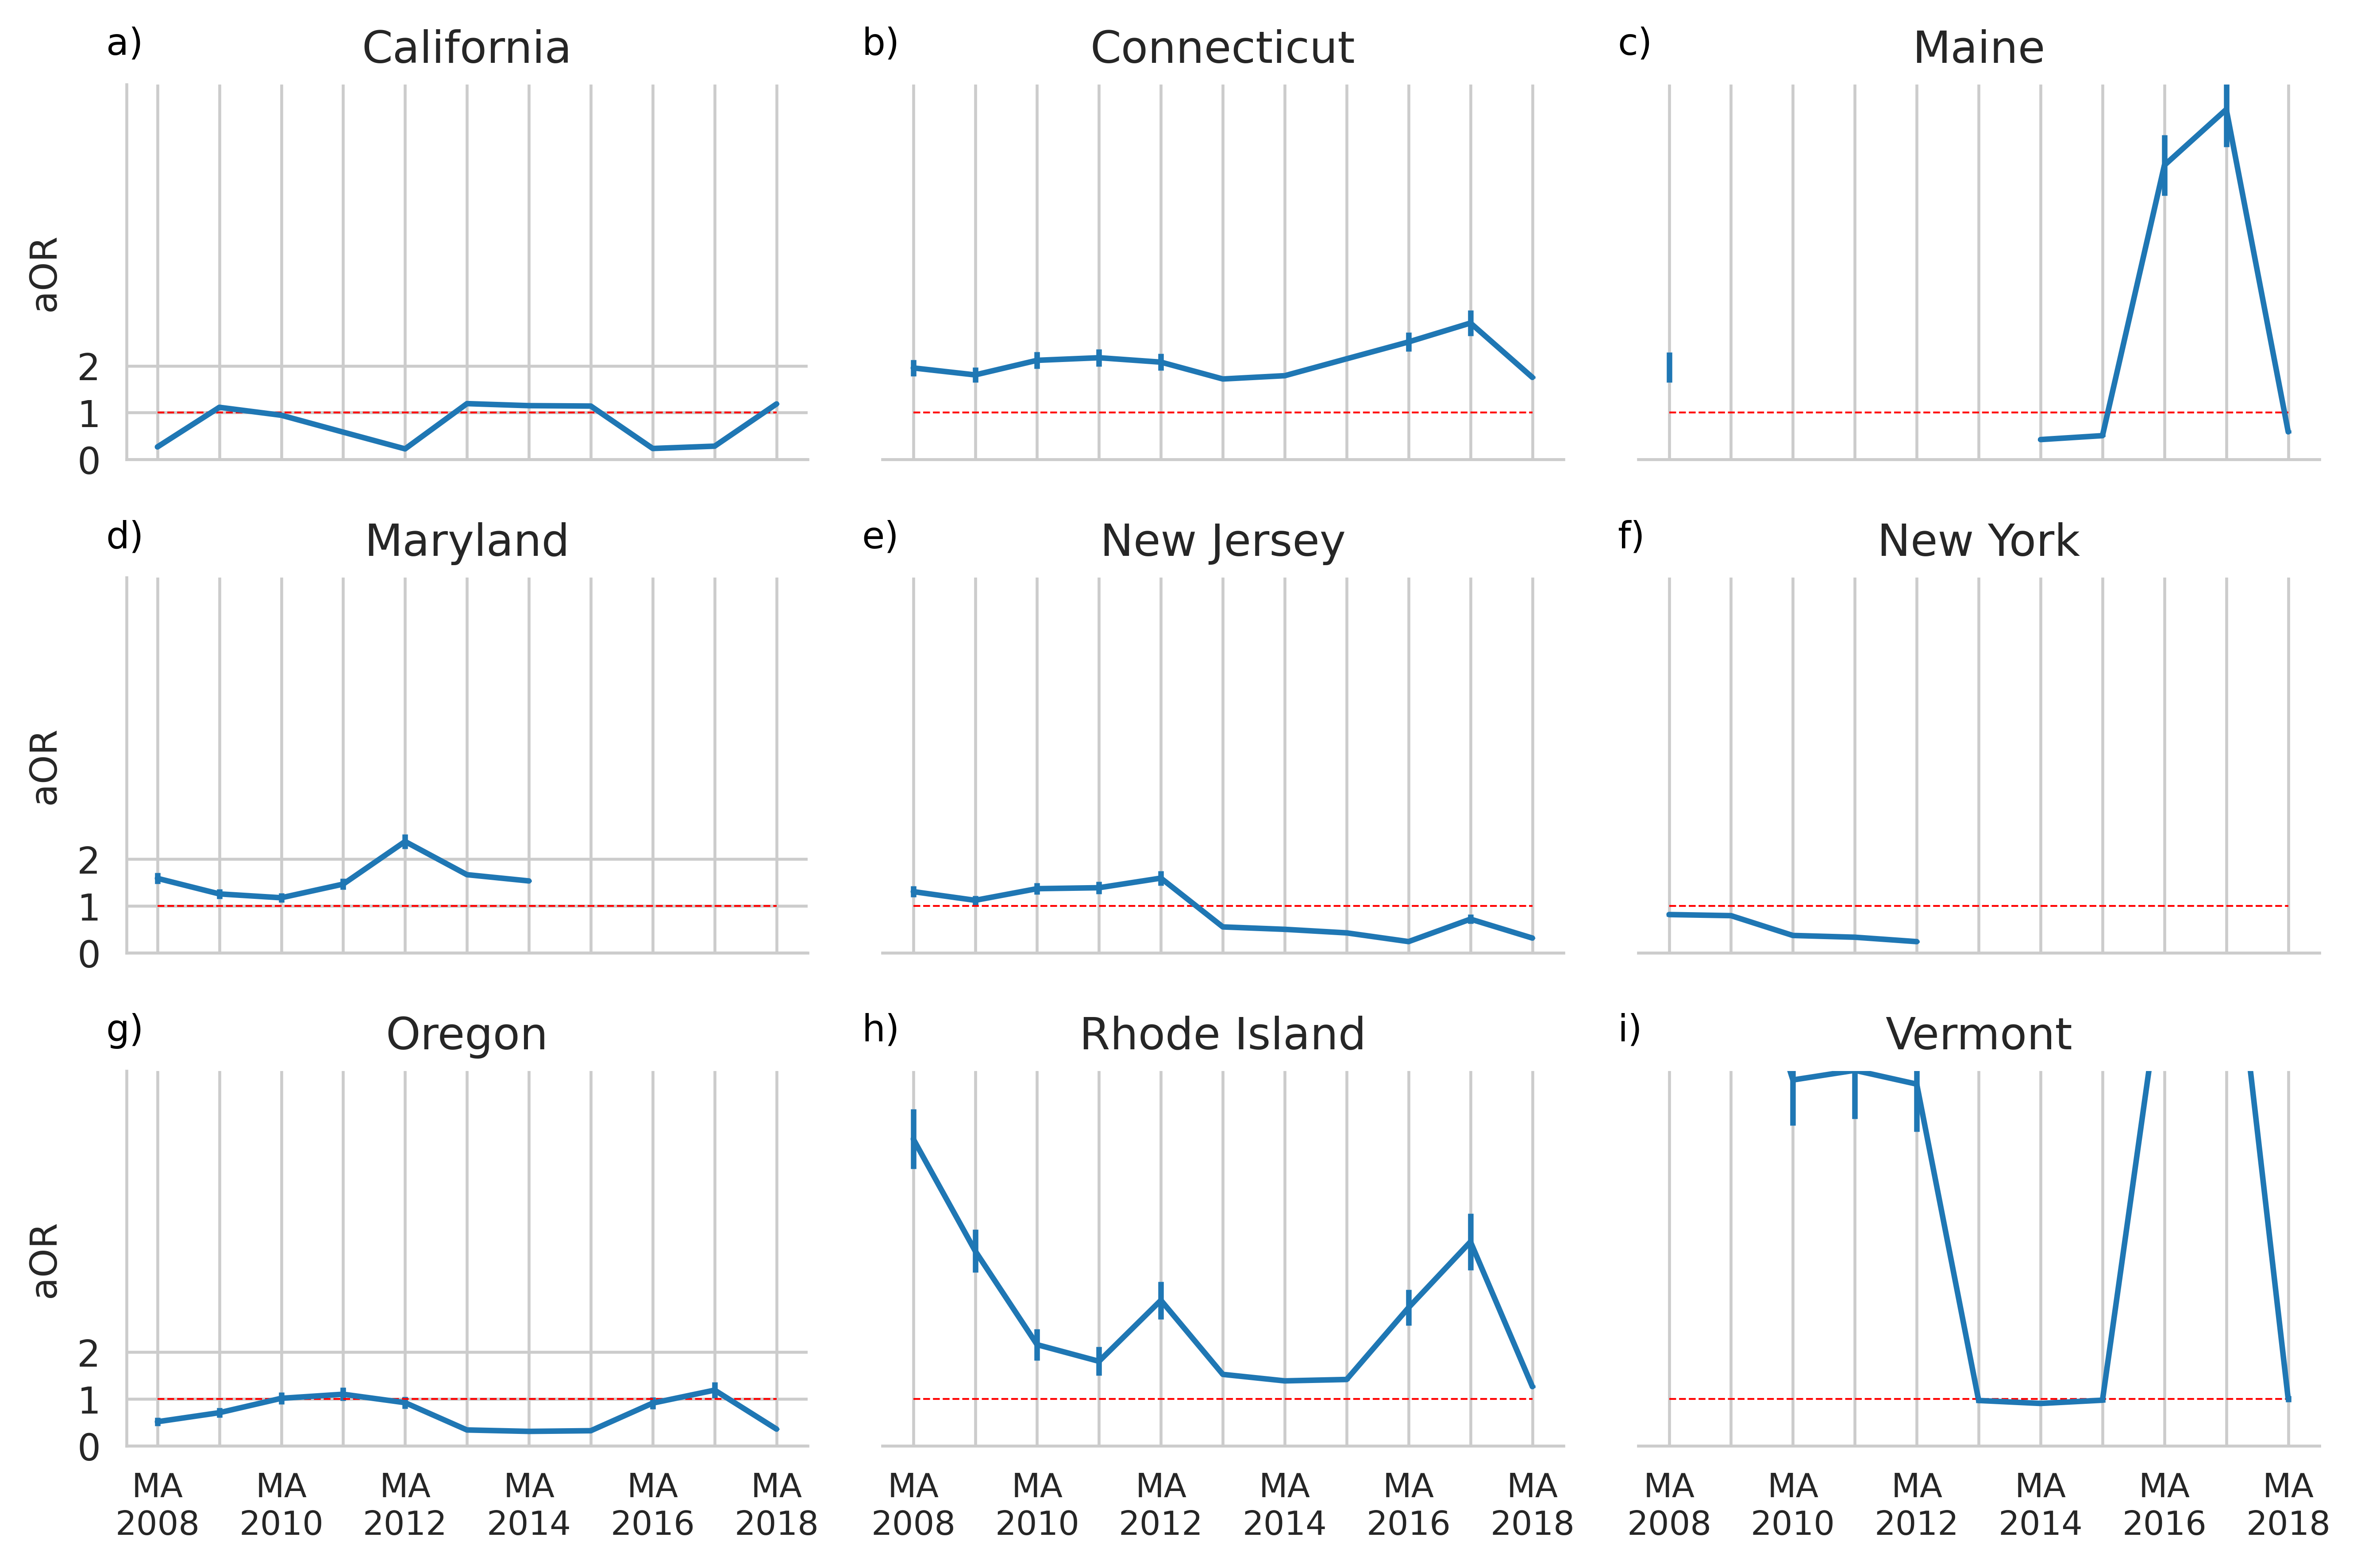

In [46]:
plot_graph("three_year_group_2")

In [63]:
"2008"[-2:]

'08'

In [93]:
0%3

0